In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')


In [2]:
okinawamesh1 = gpd.read_file('data/SDDSWS3631.zip')
okinawamesh2 = gpd.read_file('data/SDDSWS3624.zip')
okinawamesh3 = gpd.read_file('data/SDDSWS3623.zip')
okinawamesh4 = gpd.read_file('data/SDDSWS3622.zip')

In [3]:
okinawamesh = gpd.pd.concat([okinawamesh1,okinawamesh2,okinawamesh3,okinawamesh4])

<Axes: >

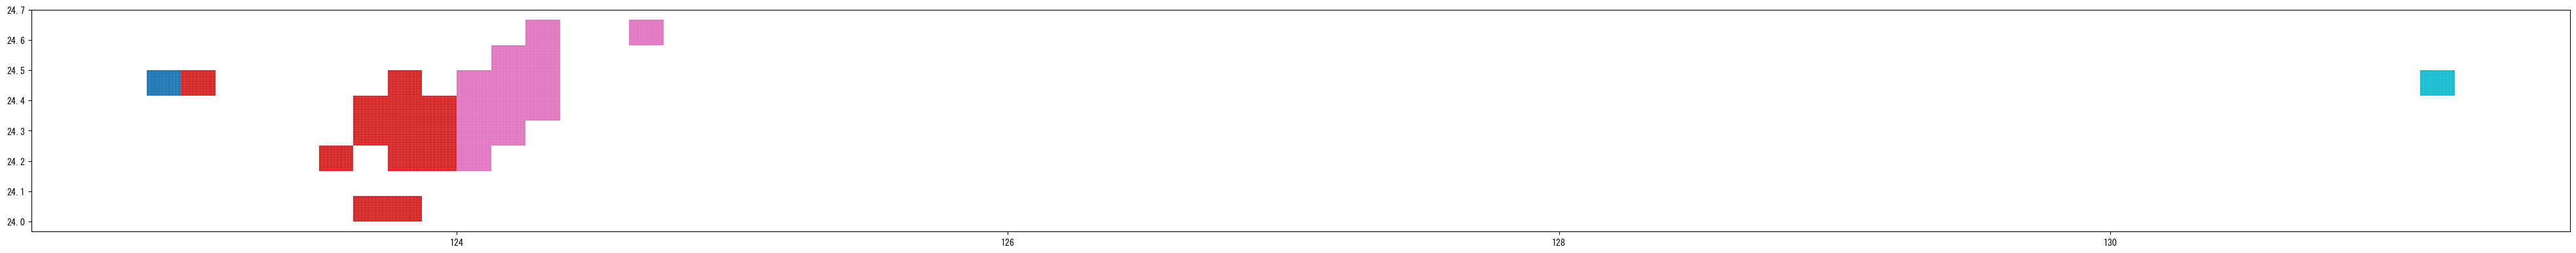

In [4]:
okinawamesh.plot(figsize=(50,10),edgecolor='white',linewidth=0.05,column='MESH1_ID')

........................T_T...........................

In [5]:
okinawadata1 = pd.read_csv('data/tblT000846S3622.zip', encoding='cp932')
okinawadata2 = pd.read_csv('data/tblT000846S3623.zip', encoding='cp932')
okinawadata3 = pd.read_csv('data/tblT000846S3624.zip', encoding='cp932')
okinawadata4 = pd.read_csv('data/tblT000846S3724.zip', encoding='cp932')
okinawadata5 = pd.read_csv('data/tblT001100S3622.zip', encoding='cp932')
okinawadata6 = pd.read_csv('data/tblT001100S3623.zip', encoding='cp932')
okinawadata7 = pd.read_csv('data/tblT001100S3624.zip', encoding='cp932')
okinawadata8 = pd.read_csv('data/tblT001100S3724.zip', encoding='cp932')

In [6]:
okinawadata5.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,36225735.0,0.0,NaN,NaN,125,106,19,5,2,3,...,0,0,6,4,2,1,4,1,1,0
2,36225738.0,0.0,NaN,NaN,129,62,67,25,9,16,...,0,0,35,30,5,8,21,2,5,5
3,36225745.0,0.0,NaN,NaN,475,249,226,105,54,51,...,7,1,112,97,15,29,65,12,25,13
4,36225756.0,0.0,NaN,NaN,49,29,20,3,1,2,...,0,0,4,3,1,2,1,1,0,1


In [7]:
okinawadata1 = okinawadata1[1:]
okinawadata2 = okinawadata2[1:]
okinawadata3 = okinawadata3[1:]
okinawadata4 = okinawadata4[1:]
okinawadata5 = okinawadata5[1:]
okinawadata6 = okinawadata6[1:]
okinawadata7 = okinawadata7[1:]
okinawadata8 = okinawadata8[1:]

In [8]:
okinawadata2020 = pd.concat([okinawadata1,okinawadata2,okinawadata3,okinawadata4])

In [9]:
okinawadata2015 = pd.concat([okinawadata5,okinawadata6,okinawadata7,okinawadata8])

In [10]:
okinawadata2015. head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,36225735.0,0.0,NaN,NaN,125,106,19,5,2,3,...,0,0,6,4,2,1,4,1,1,0
2,36225738.0,0.0,NaN,NaN,129,62,67,25,9,16,...,0,0,35,30,5,8,21,2,5,5
3,36225745.0,0.0,NaN,NaN,475,249,226,105,54,51,...,7,1,112,97,15,29,65,12,25,13
4,36225756.0,0.0,NaN,NaN,49,29,20,3,1,2,...,0,0,4,3,1,2,1,1,0,1
5,36225758.0,1.0,NaN,36225759.0,12,6,6,3,1,2,...,1,0,3,2,1,2,2,0,1,0


In [11]:
columns= ['HTKSYORI','HTKSAKI','GASSAN']
okinawadata2015= okinawadata2015.drop(columns= columns)

In [12]:
okinawadata2020= okinawadata2020.drop(columns=columns)

In [13]:
okinawadata= pd.merge(okinawadata2020,okinawadata2015,on= 'KEY_CODE')

In [14]:
okinawadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    190 non-null    float64
 1   T000846001  190 non-null    object 
 2   T000846002  190 non-null    object 
 3   T000846003  190 non-null    object 
 4   T000846004  190 non-null    object 
 5   T000846005  190 non-null    object 
 6   T000846006  190 non-null    object 
 7   T000846007  190 non-null    object 
 8   T000846008  190 non-null    object 
 9   T000846009  190 non-null    object 
 10  T000846010  190 non-null    object 
 11  T000846011  190 non-null    object 
 12  T000846012  190 non-null    object 
 13  T000846013  190 non-null    object 
 14  T000846014  190 non-null    object 
 15  T000846015  190 non-null    object 
 16  T000846016  190 non-null    object 
 17  T000846017  190 non-null    object 
 18  T000846018  190 non-null    object 
 19  T000846019  190 non-null    o

In [15]:
okinawadata.columns

Index(['KEY_CODE', 'T000846001', 'T000846002', 'T000846003', 'T000846004',
       'T000846005', 'T000846006', 'T000846007', 'T000846008', 'T000846009',
       'T000846010', 'T000846011', 'T000846012', 'T000846013', 'T000846014',
       'T000846015', 'T000846016', 'T000846017', 'T000846018', 'T000846019',
       'T000846020', 'T000846021', 'T000846022', 'T000846023', 'T000846024',
       'T000846025', 'T000846026', 'T000846027', 'T000846028', 'T000846029',
       'T000846030', 'T000846031', 'T000846032', 'T000846033', 'T000846034',
       'T000846035', 'T000846036', 'T000846037', 'T000846038', 'T000846039',
       'T000846040', 'T000846041', 'T001100001', 'T001100002', 'T001100003',
       'T001100004', 'T001100005', 'T001100006', 'T001100007', 'T001100008',
       'T001100009', 'T001100010', 'T001100011', 'T001100012', 'T001100013',
       'T001100014', 'T001100015', 'T001100016', 'T001100017', 'T001100018',
       'T001100019', 'T001100020', 'T001100021', 'T001100022', 'T001100023',
 

In [16]:
okinawadata.columns[1:]

Index(['T000846001', 'T000846002', 'T000846003', 'T000846004', 'T000846005',
       'T000846006', 'T000846007', 'T000846008', 'T000846009', 'T000846010',
       'T000846011', 'T000846012', 'T000846013', 'T000846014', 'T000846015',
       'T000846016', 'T000846017', 'T000846018', 'T000846019', 'T000846020',
       'T000846021', 'T000846022', 'T000846023', 'T000846024', 'T000846025',
       'T000846026', 'T000846027', 'T000846028', 'T000846029', 'T000846030',
       'T000846031', 'T000846032', 'T000846033', 'T000846034', 'T000846035',
       'T000846036', 'T000846037', 'T000846038', 'T000846039', 'T000846040',
       'T000846041', 'T001100001', 'T001100002', 'T001100003', 'T001100004',
       'T001100005', 'T001100006', 'T001100007', 'T001100008', 'T001100009',
       'T001100010', 'T001100011', 'T001100012', 'T001100013', 'T001100014',
       'T001100015', 'T001100016', 'T001100017', 'T001100018', 'T001100019',
       'T001100020', 'T001100021', 'T001100022', 'T001100023', 'T001100024',

In [17]:
okinawadata[okinawadata.columns[1:]]=okinawadata[okinawadata.columns[1:]].astype(float)

ValueError: could not convert string to float: '*'